In this notebook, I will focus on an example of binary classification, where the model must predict a label that belongs to one of two classes. In this exercise, I'll train a binary classifier to predict whether or not a patient should be tested for diabetes based on some medical data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import wget

In [5]:
# Download the CSV file
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv"
filename = "diabetes.csv"
wget.download(url, filename)

# Read the CSV file into a DataFrame
diabetes = pd.read_csv(filename)

# Display the first few rows of the DataFrame
print(diabetes.head())

   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0  


In [7]:
diabetes.tail(20)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
14980,1552787,9,56,48,35,21,19.321562,0.614377,23,0
14981,1043211,0,87,42,12,164,31.037803,0.190068,24,0
14982,1886535,6,86,73,10,412,38.204487,0.199657,21,1
14983,1020389,8,113,66,43,214,19.138671,0.143024,22,1
14984,1733877,8,119,70,21,63,51.877294,0.172106,44,1
14985,1579507,0,75,55,7,206,50.329863,0.102772,25,0
14986,1562505,6,119,76,15,80,36.680032,0.200504,22,1
14987,1840388,2,81,79,69,20,35.093644,0.766683,47,1
14988,1331925,2,66,67,22,72,30.715694,0.129056,21,1
14989,1317369,6,132,90,38,128,20.647840,0.265326,43,0


The consists of information about patients who have been tested for diabetes. In the Diabetic column, 0 represents not diabetic and 1 represents diabetic. This is the label that we will train our model to predict; most of the other columns (Pregnancies,PlasmaGlucose,DiastolicBloodPressure, and so on) are the features we will use to predict the Diabetic label.

In [8]:
#separate the features andd labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = "Diabetic"
X,y = diabetes[features].values, diabetes[label].values

for n in range(0, 5):
    print("Patient" + str(n+1), "\n Features:", list(X[n]), "\n Label:", y[n])
    

Patient1 
 Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
 Label: 0
Patient2 
 Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
 Label: 0
Patient3 
 Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
 Label: 0
Patient4 
 Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
 Label: 1
Patient5 
 Features: [1.0, 85.0, 59.0, 27.0, 35.0, 42.60453585, 0.549541871, 22.0] 
 Label: 0


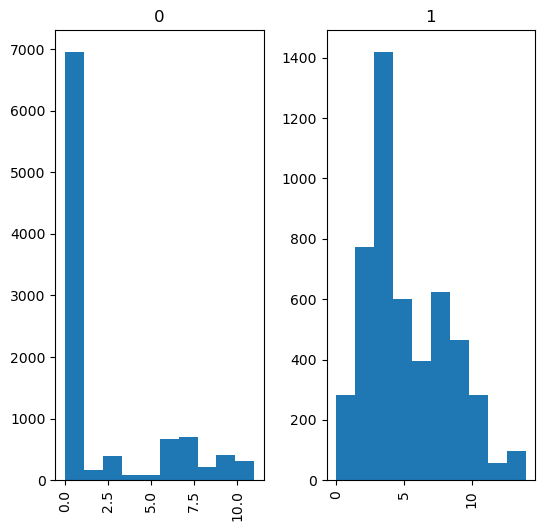

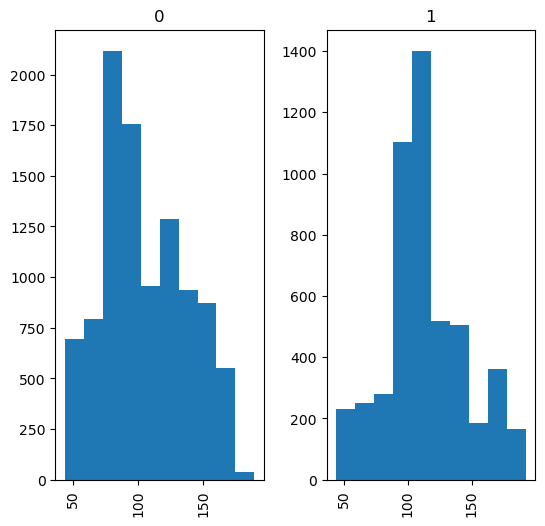

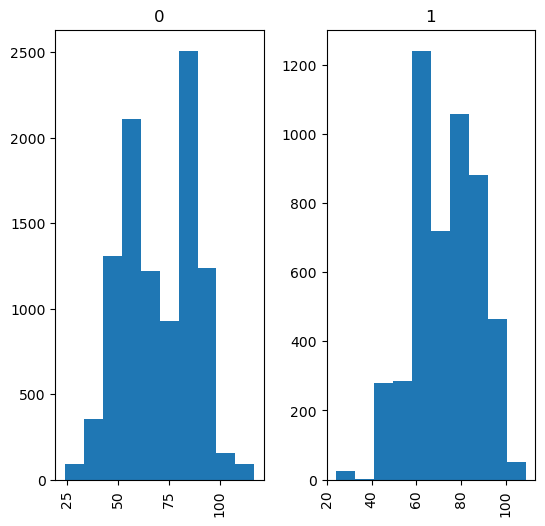

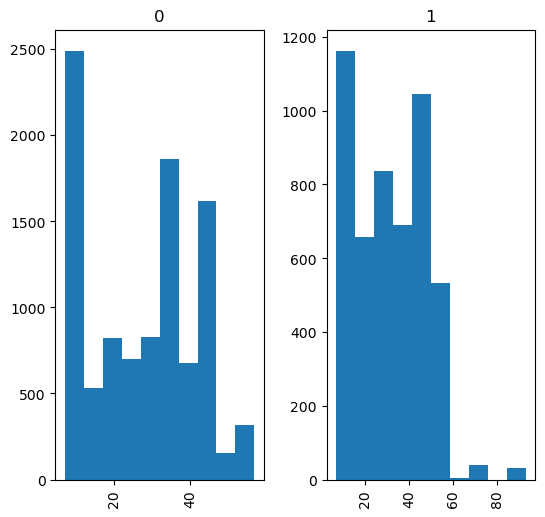

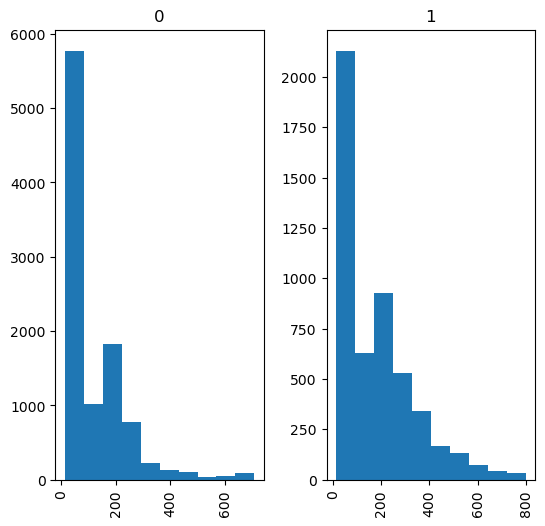

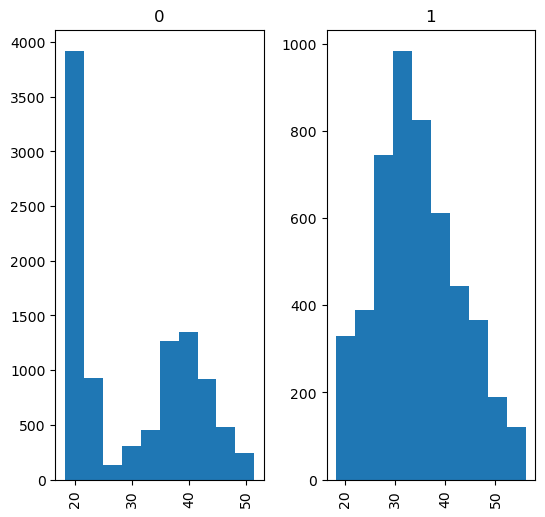

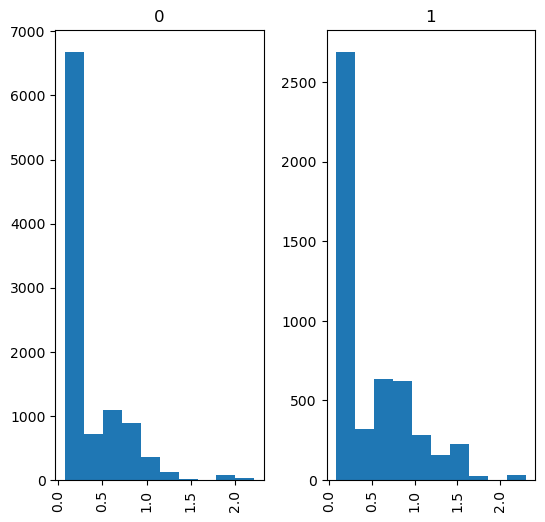

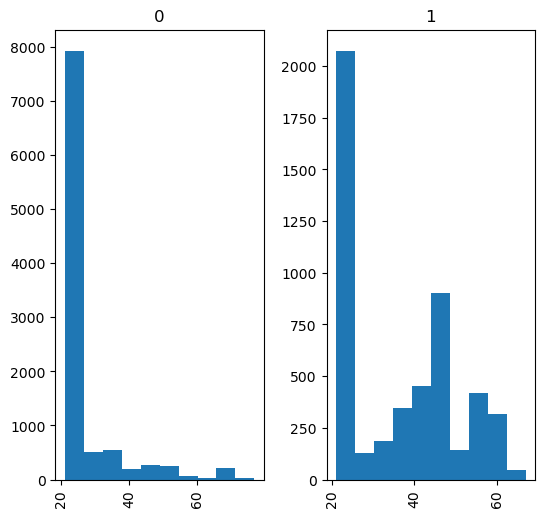

In [9]:
for col in features:
    diabetes.hist(column=col, by="Diabetic", figsize=(6,6))
    plt.title(col)

plt.show()